## Introduction
-----
You (an electrical engineer) wish to determine the resistance of an electrical component by using Ohm's law. You remember from your high school circuit classes that $$V = RI$$ where $V$ is the voltage in volts, $R$ is resistance in ohms, and $I$ is electrical current in amperes. Using a multimeter, you collect the following data:

| Current (A) | Voltage (V) |
|-------------|-------------|
| 0.2         | 1.23        |
| 0.3         | 1.38        |
| 0.4         | 2.06        |
| 0.5         | 2.47        |
| 0.6         | 3.17        |

Your goal is to 
1. Fit a line through the origin (i.e., determine the parameter $R$ for $y = Rx$) to this data by using the method of least squares. You may assume that all measurements are of equal importance. 
2. Consider what the best estimate of the resistance is, in ohms, for this component.

## Getting Started
----

First we will import the neccesary Python modules and load the current and voltage measurements into numpy arrays:

In [8]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Store the voltage and current data as column vectors.
I = np.mat([0.2, 0.3, 0.4, 0.5, 0.6]).T
V = np.mat([1.23, 1.38, 2.06, 2.47, 3.17]).T

Now we can plot the measurements - can you see the linear relationship between current and voltage?

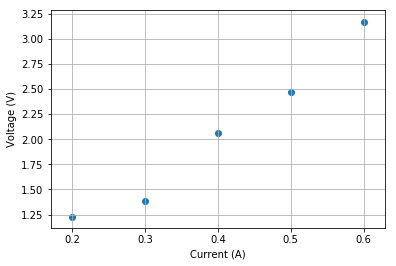

In [9]:
plt.scatter(np.asarray(I), np.asarray(V))

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

## Estimating the Slope Parameter
----
Let's try to estimate the slope parameter $R$ (i.e., the resistance) using the least squares formulation from Module 1, Lesson 1 - "The Squared Error Criterion and the Method of Least Squares":

\begin{align}
\hat{R} = \left(\mathbf{H}^T\mathbf{H}\right)^{-1}\mathbf{H}^T\mathbf{y}
\end{align}

If we know that we're looking for the slope parameter $R$, how do we define the matrix $\mathbf{H}$ and vector $\mathbf{y}$?

### Solution
The general equation for a line is $y=Mx+b$. Rewritten for our case, the line we are trying to solve for $V=RI+b$. 

The general equation for least squares is of the form $Ax=b$. Note that the $b$ here is not the same as the $b$ in the equation for a line. With this form, $A$ represents the coefficients on $M$ and $b$ from the equation for a line, $x$ represents the variables we are trying to solve for (generally, $M$ and $b$), and the $b$ here is the output of our line (generally, $y$). 

We can write our system of equations as:

$$V_1=R*I_1+b$$
$$V_2=R*I_2+b$$
$$V_3=R*I_3+b$$
$$V_4=R*I_4+b$$
$$V_5=R*I_5+b$$

And then our least squares matrices become:
$$A=\begin{bmatrix}I_1 & 1\\I_2 & 1\\I_3 & 1\\I_4 & 1\\I_5 & 1\end{bmatrix}$$
$$x=\begin{bmatrix}R & b\end{bmatrix}$$
$$b=\begin{bmatrix}V_1\\V_2\\V_3\\V_4\\V_5\end{bmatrix}$$

Expressed as in the problem statement, $H=A$ and $y=b$. $\hat{R}$ will be the first item in our $x$ matrix.

In [33]:
# Define the H matrix, what does it contain?
# H is the conversion coefficients from measurement to parameter space, also known as the Jacobian
H = np.ones((np.size(I), 2)) 
H[:,0] = np.asarray(I).T[0] # set all elements in the zeroth col of H to the corresponding elements of I
#print(H)

# Now estimate the resistance parameter
x = inv(H.T.dot(H)).dot(H.T.dot(V)) # calculate matrix
#print(x)

print('The slope parameter (i.e., resistance) for the best-fit line is:')
R = x[0]
print(R)


The slope parameter (i.e., resistance) for the best-fit line is:
[[4.97]]


## Plotting the Results
----
Now let's plot our result. How do we relate our linear parameter fit to the resistance value in ohms?

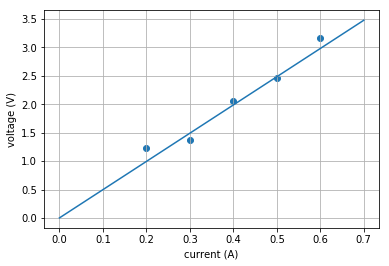

R_hat = 4.970000000000006


In [34]:
I_line = np.arange(0, 0.8, 0.1)
R = np.asscalar(R) # convert to scalar
V_line = R*I_line

plt.scatter(np.asarray(I), np.asarray(V))
plt.plot(I_line, V_line)
plt.xlabel('current (A)')
plt.ylabel('voltage (V)')
plt.grid(True)
plt.show()
print("R_hat =", R)

If you have implemented the estimation steps correctly, the slope parameter $\hat{R}$ should be close to the actual resistance value of $R = 5~\Omega$. However, the estimated value will not match the true resistance value exactly, since we have only a limited number of noisy measurements.